### Creating an appropriate visualization to show the distribution of profiles:

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r'C:\Users\mk106\OneDrive\Desktop\Mamatha courses and certificates\Instacart Basket Analysis'

In [3]:
# Downloading the most recent data frame with the lastest additions - 'df_end_final.pkl'
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_end_final.pkl'))

In [4]:
# Removing the limit to the amount of columns displayed by default: 
pd.set_option('display.max_columns', None)

In [5]:
df.head()

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,price_range_loc,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price,spending_flag,median_orders,order_frequency_flag,first_name,Surnam,gender,STATE,age,date_joined,num_of_dependants,marital_status,income,region,activity_flag,age_group,income_group,department,dependants_group,family_profile
0,2539329,1,prior,1,2,8,NaN,196,1,0,Soda,77,7,9.0,both,NaN,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,active customer,30-44 years old,Low Income,beverages,Has dependants,married female with children
1,2398795,1,prior,2,3,7,15.0,196,1,1,Soda,77,7,9.0,both,NaN,Mid-range product,Regularly busy,Least busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,active customer,30-44 years old,Low Income,beverages,Has dependants,married female with children
2,473747,1,prior,3,3,12,21.0,196,1,1,Soda,77,7,9.0,both,NaN,Mid-range product,Regularly busy,Least busy days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,active customer,30-44 years old,Low Income,beverages,Has dependants,married female with children
3,2254736,1,prior,4,4,7,29.0,196,1,1,Soda,77,7,9.0,both,NaN,Mid-range product,Least busy,Least busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,active customer,30-44 years old,Low Income,beverages,Has dependants,married female with children
4,431534,1,prior,5,4,15,28.0,196,1,1,Soda,77,7,9.0,both,NaN,Mid-range product,Least busy,Least busy days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,active customer,30-44 years old,Low Income,beverages,Has dependants,married female with children


In [6]:
df.columns

Index(['order_id', 'user_id', 'eval_set', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_last_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', '_merge', ' price_range_loc',
       'price_range_loc', 'busiest_day', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'average_price',
       'spending_flag', 'median_orders', 'order_frequency_flag', 'first_name',
       'Surnam', 'gender', 'STATE', 'age', 'date_joined', 'num_of_dependants',
       'marital_status', 'income', 'region', 'activity_flag', 'age_group',
       'income_group', 'department', 'dependants_group', 'family_profile'],
      dtype='object')

### Creating an appropriate visualization to show the distribution of profiles

#### Distribution of Family Profiles

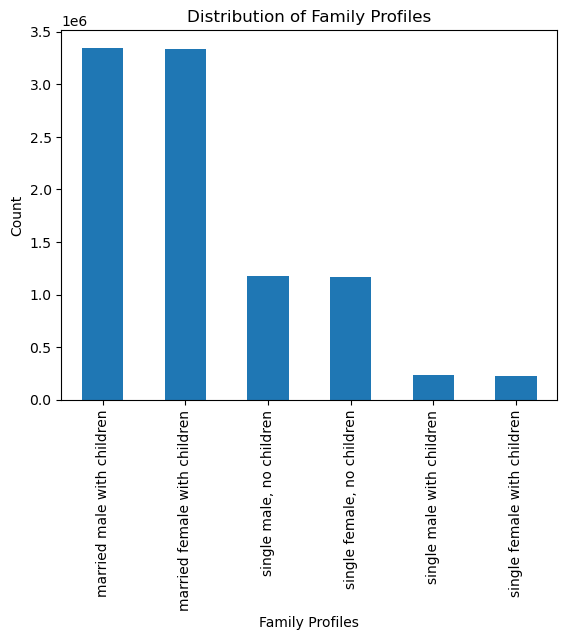

In [7]:
family_profile_distribution_bar = df['family_profile'].value_counts().plot.bar()
plt.title('Distribution of Family Profiles')
plt.xlabel('Family Profiles')
plt.ylabel('Count')
plt.show()

In [9]:
# Exporting the bar outside Jupyter through figure.savefig() - family_profile_distribution_bar
family_profile_distribution_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'family_profile_distribution_bar_orders_dow.png'))

### Basic stats for Family Profile

In [10]:
# Aggregating the max, mean, and min variables on a customer-profile level (family_profile) for usage frequency and expenditure
family_profile_agg = df.groupby('family_profile').agg({'order_id': 'count','prices': ['min', 'mean', 'max']})

In [11]:
family_profile_agg

order_id prices                    
                                count    min       mean      max
family_profile                                                  
married female with children  3337498    1.0  11.685030  99999.0
married male with children    3347781    1.0  10.833498  99999.0
single female with children    226303    1.0  11.026267  99999.0
single female, no children    1163045    1.0  10.649544  99999.0
single male with children      234109    1.0   9.605175  14900.0
single male, no children      1179720    1.0  10.458171  99999.0

### Comparing customers profiles with regions and departments

#### Family Profile Distribution by Region

In [13]:
# family_profile in different regions 
fam_region_profile = pd.crosstab(df['family_profile'],df['region'], dropna = False)

In [14]:
fam_region_profile

region,Midwest,Northeast,South,West
family_profile,,,,
married female with children,780099,586958,1109626,860815
married male with children,772141,609379,1122209,844052
single female with children,48128,31767,88584,57824
"single female, no children",264623,213151,391927,293344
single male with children,57468,34113,82425,60103
"single male, no children",289598,216511,387997,285614


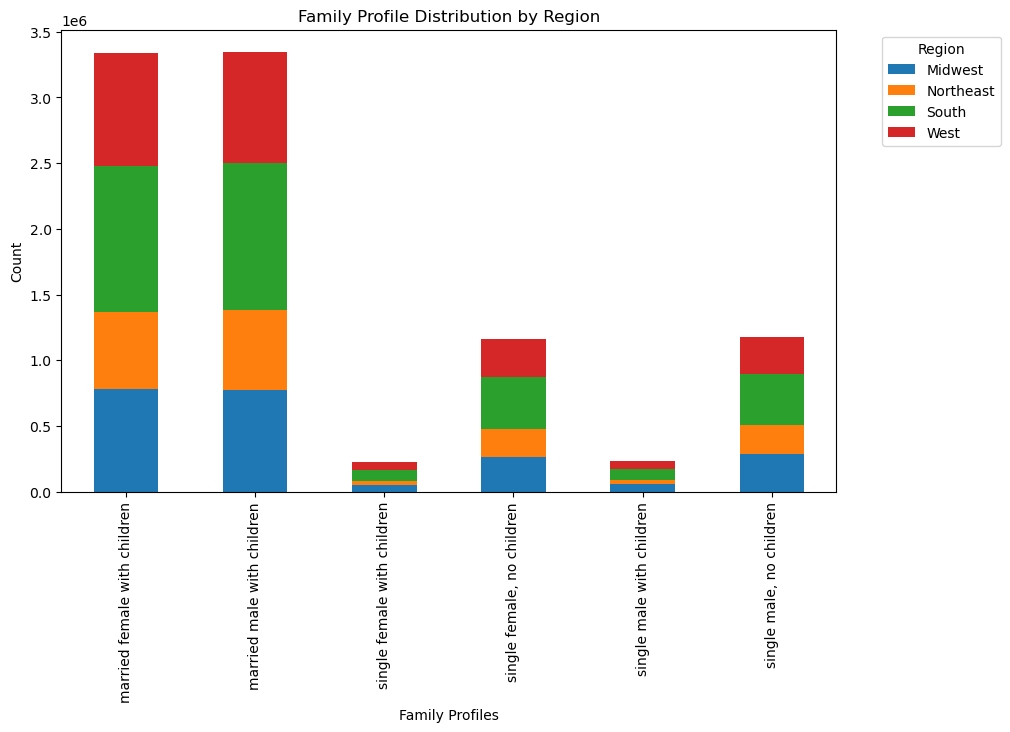

In [15]:
fam_region_profile_bar_stacked = fam_region_profile.plot.bar(stacked=True, figsize=(10, 6))

plt.title('Family Profile Distribution by Region')
plt.xlabel('Family Profiles')
plt.ylabel('Count')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')

In [17]:
fam_region_profile_bar_stacked.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'fam_region_profile_bar_stacked_orders_dow.png'))

### Family Profile Distribution by Department

In [19]:
# Comparing family_profile in different department - crosstab created 
fam_department_profile = pd.crosstab(df['department'],df['family_profile'], dropna = False)

In [20]:
fam_department_profile

family_profile,married female with children,married male with children,single female with children,"single female, no children",single male with children,"single male, no children"
department,,,,,,
alcohol,16228,13508,1576,5439,1378,5367
babies,42767,43895,3059,15299,3589,16044
bakery,121995,119769,7468,43588,8784,43264
beverages,278178,275752,17465,96917,18302,100402
breakfast,74021,72317,4896,25488,5232,25528
bulk,3637,3894,252,1090,213,1174
canned goods,108920,110594,6943,37817,8118,39105
dairy eggs,558237,560997,40097,194704,39122,193939
deli,108324,109663,7093,37480,7532,39728


### Income (income_group) distribution stats

In [34]:
income_group_distribution_agg = df.groupby('income_group').agg({'order_id': 'count','prices': ['min', 'mean', 'max']})

In [35]:
income_group_distribution_agg

order_id prices                    
                 count    min       mean      max
income_group                                     
High Income    2371524    1.0  19.004038  99999.0
Low Income     2372748    1.0   7.298644     25.0
Middle Income  4744184    1.0   8.926323  99999.0

Text(0, 0.5, 'Count')

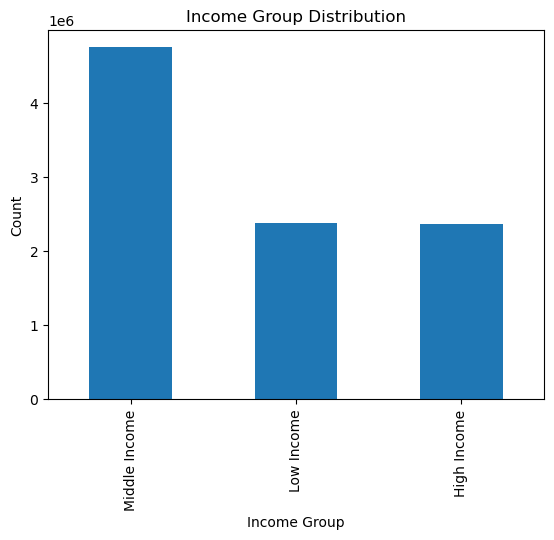

In [36]:
income_group_distribution = df['income_group'].value_counts().plot.bar()
plt.title('Income Group Distribution')
plt.xlabel('Income Group')
plt.ylabel('Count')

### Income (income_group) By Region

In [45]:
income_group_region = pd.crosstab(df['income_group'],df['region'], dropna = False)

In [46]:
income_group_region

region,Midwest,Northeast,South,West
income_group,,,,
High Income,568077,423783,783788,595876
Low Income,552979,407064,814204,598501
Middle Income,1091001,861032,1584776,1207375


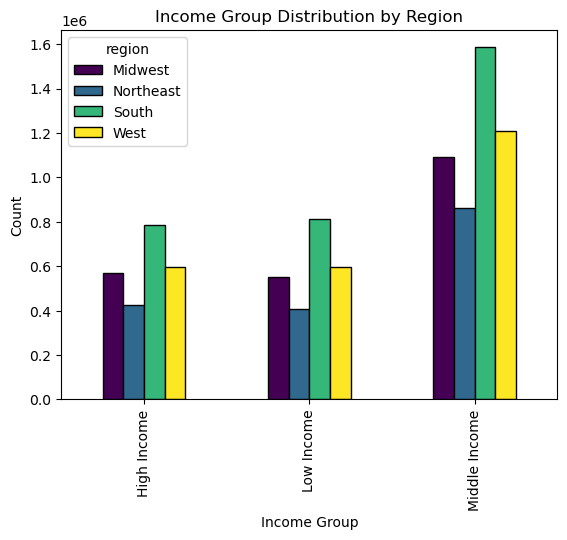

In [47]:
income_group_region_bar = income_group_region.plot(kind='bar', colormap='viridis', edgecolor='black')

# Adding labels and title
plt.title('Income Group Distribution by Region')
plt.xlabel('Income Group')
plt.ylabel('Count')

# Show the plot
plt.show()

In [53]:
income_group_region_bar.figure.savefig(os.path.join(path, '04 Analysis', 'income_group_region_bar_orders_dow.png'))

### Income Group Distribution by Department

In [57]:
income_group_department = pd.crosstab(df['department'],df['income_group'], dropna = False)

In [58]:
income_group_department

income_group,High Income,Low Income,Middle Income
department,,,
alcohol,12627,11240,19629
babies,31549,26204,66900
bakery,89908,82200,172760
beverages,188635,228315,370066
breakfast,51154,57734,98594
bulk,2164,2783,5313
canned goods,81079,69022,161396
dairy eggs,403899,378648,804549
deli,78196,75564,156060


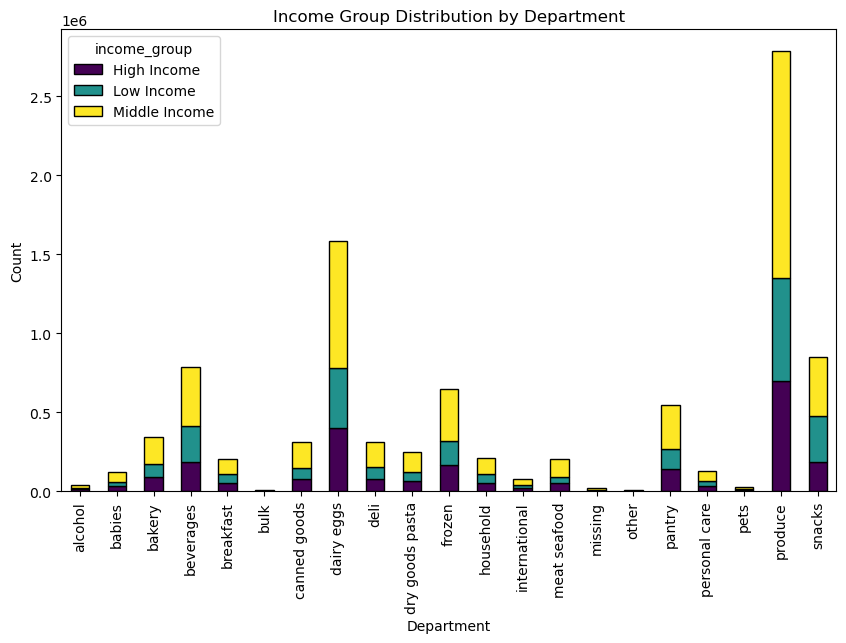

In [59]:
income_group_department_bar = income_group_department.plot(kind='bar', stacked=True, colormap='viridis', edgecolor='black', figsize=(10, 6))

# Adding labels and title
plt.title('Income Group Distribution by Department')
plt.xlabel('Department')
plt.ylabel('Count')

# Show the plot
plt.show()

In [60]:
income_group_department_bar.figure.savefig(os.path.join(path, '04 Analysis', 'income_group_department_bar_orders_dow.png'))

### Distribution of Age Groups

In [61]:
age_group_agg = df.groupby('age_group').agg({'order_id': 'count','prices': ['min', 'mean', 'max']})

In [62]:
age_group_agg

order_id prices                    
                   count    min       mean      max
age_group                                          
18-29 years old  1779057    1.0  10.894690  99999.0
30-44 years old  2237623    1.0  10.836362  99999.0
45-59 years old  2238111    1.0  11.010357  99999.0
60-81 years old  3233665    1.0  11.275789  99999.0

Text(0, 0.5, 'Count')

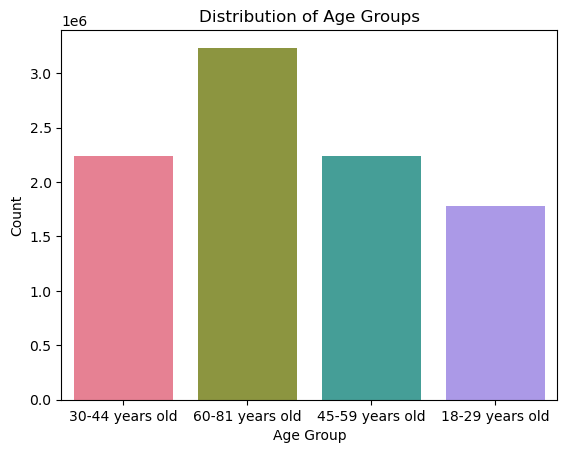

In [63]:
colors = sns.color_palette("husl", len(df['age_group'].unique()))
age_group_distribution_bar = sns.countplot(x='age_group', data=df, palette=colors)

# Adding labels and title
plt.title('Distribution of Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')

In [64]:
age_group_distribution_bar.figure.savefig(os.path.join(path, '04 Analysis', 'age_group_distribution_bar_orders_dow.png'))

### Age Group by Region

In [65]:
age_group_region = pd.crosstab(df['region'], df['age_group'], dropna = False)

In [66]:
age_group_region

age_group,18-29 years old,30-44 years old,45-59 years old,60-81 years old
region,,,,
Midwest,401850,537767,531165,741275
Northeast,309053,391739,397215,593872
South,619192,763154,718790,1081632
West,448962,544963,590941,816886


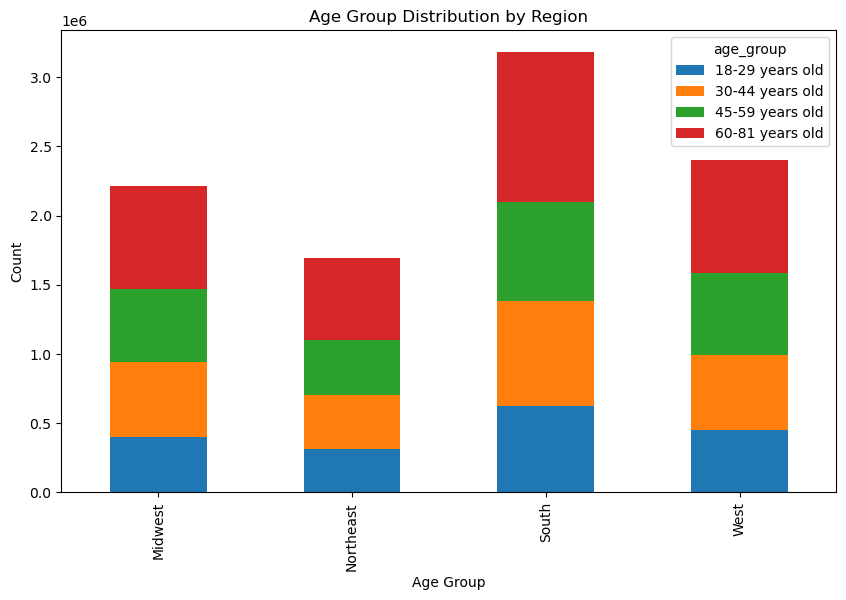

In [67]:
age_group_region_bar = age_group_region.plot(kind='bar', stacked=True, figsize=(10, 6))
# Adding labels and title
plt.title('Age Group Distribution by Region')
plt.xlabel('Age Group')
plt.ylabel('Count')

# Show the plot
plt.show()

In [68]:
age_group_region_bar.figure.savefig(os.path.join(path, '04 Analysis', 'age_group_region_bar_orders_dow.png'))

### Age Group by Department

In [70]:
age_group_department = pd.crosstab(df['department'], df['age_group'], dropna = False)

In [71]:
age_group_department

age_group,18-29 years old,30-44 years old,45-59 years old,60-81 years old
department,,,,
alcohol,8961,10336,10867,13332
babies,25402,28876,30084,40291
bakery,64209,81849,80419,118391
beverages,145117,183441,189806,268652
breakfast,39129,48832,50283,69238
bulk,1914,2469,2461,3416
canned goods,59196,73353,73325,105623
dairy eggs,300761,375597,372051,538687
deli,56940,73522,72179,107179


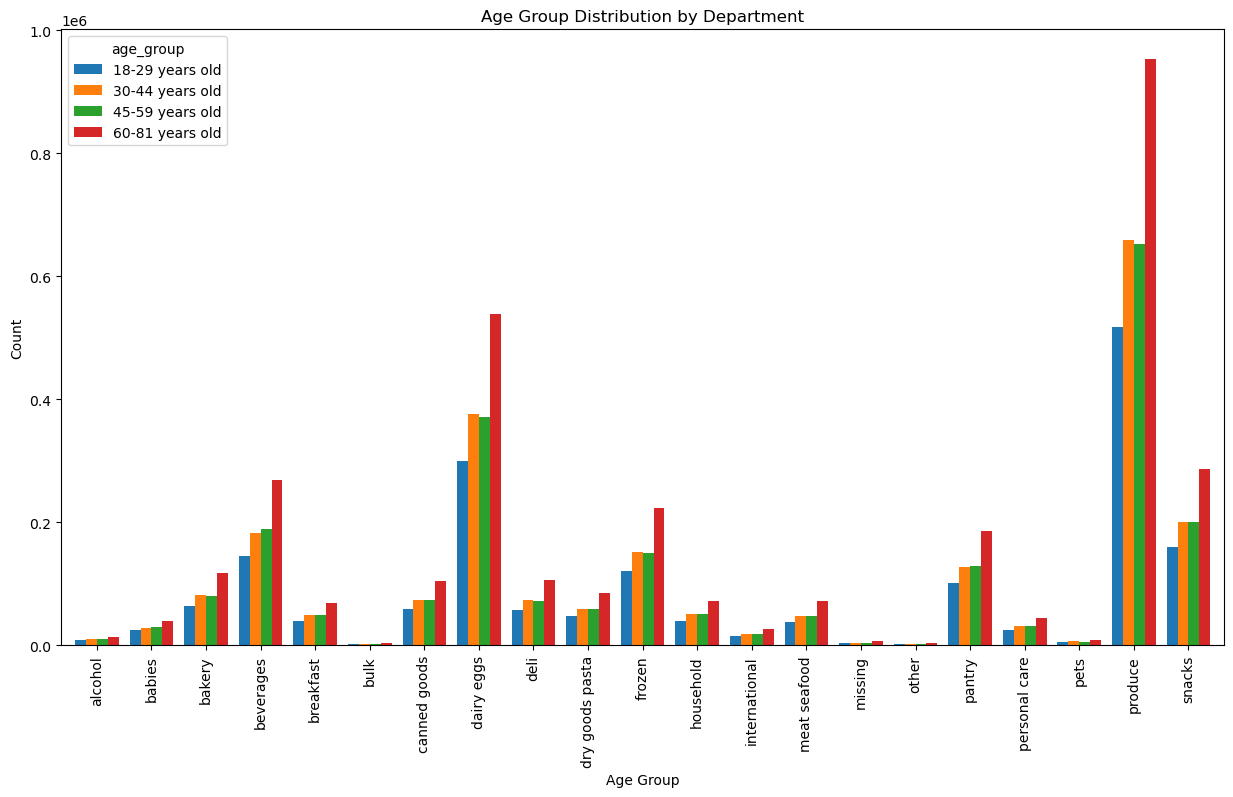

In [72]:
age_group_department_bar = age_group_department.plot(kind='bar', figsize=(15, 8), width=0.8)  # You can adjust the width as needed
plt.title('Age Group Distribution by Department')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

In [73]:
age_group_department_bar.figure.savefig(os.path.join(path, '04 Analysis', 'age_group_department_bar_orders_dow.png'))

### Most Requested Departments

In [75]:
department_stats = df.groupby('department').agg({'order_id': 'count','prices': ['min', 'mean', 'max']})

In [76]:
department_stats

order_id prices                    
                   count    min       mean      max
department                                         
alcohol            43496    1.0   8.200848     15.0
babies            124653    1.0   7.662402     15.0
bakery            344868    1.0   7.870259     15.0
beverages         787016    1.0   7.686385     15.0
breakfast         207482    1.0   8.063668     14.9
bulk               10260    1.4   8.315292     14.1
canned goods      311497    1.0   7.545889     15.0
dairy eggs       1587096    1.0  27.746661  99999.0
deli              309820    1.0   7.806819     15.0
dry goods pasta   250829    1.0   7.372298     15.0
frozen            645780    1.0   7.739269     15.0
household         214833    1.0   7.368185     15.0
international      78663    1.0   7.616323     15.0
meat seafood      206883    8.0  16.305793     25.0
missing            19670    1.0   8.589248     15.0
other              10386    1.1   6.935577     15.0
pantry            544858    1.0   8.016503     20.0
personal care     131504    1.0   8.002119     15.0
pets               28162    1.0   7.871050     15.0
produce          2782541    1.0   7.975595     15.0
snacks            848159    1.6   4.264746      7.0

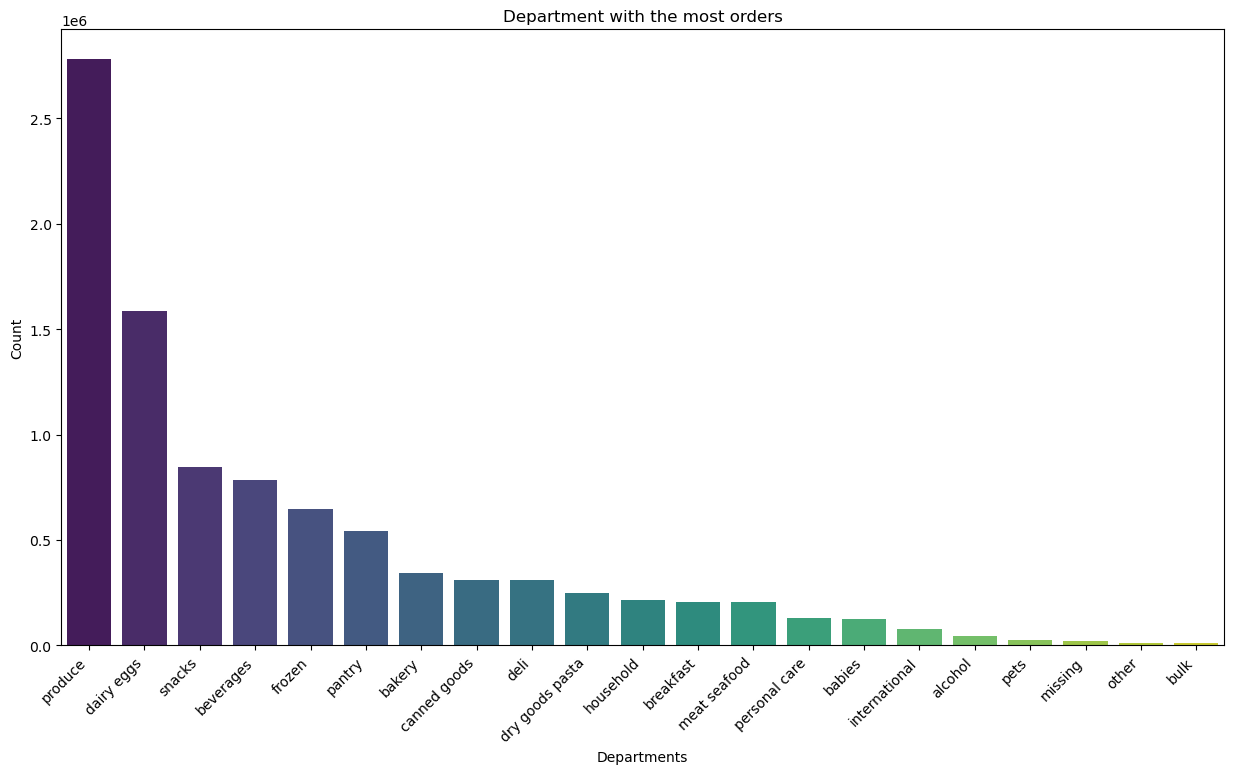

In [77]:
department_counts = df['department'].value_counts()
departments_distribution_bar = plt.figure(figsize=(15, 8))
sns.barplot(x=department_counts.index, y=department_counts.values, palette='viridis')
plt.title('Department with the most orders')
plt.xlabel('Departments')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show() 

In [78]:
departments_distribution_bar.figure.savefig(os.path.join(path, '04 Analysis','departments_distribution_bar_orders_dow.png'))

### Departments by Region

In [80]:
depatment_region = pd.crosstab(df['department'],df['region'], dropna = False)

In [81]:
depatment_region

region,Midwest,Northeast,South,West
department,,,,
alcohol,9954,7462,14738,11342
babies,29478,23549,41137,30489
bakery,80731,62058,114726,87353
beverages,182457,143151,266804,194604
breakfast,48046,37538,69288,52610
bulk,2502,1651,3247,2860
canned goods,72558,55598,103281,80060
dairy eggs,367138,283287,536365,400306
deli,71020,56344,104068,78388


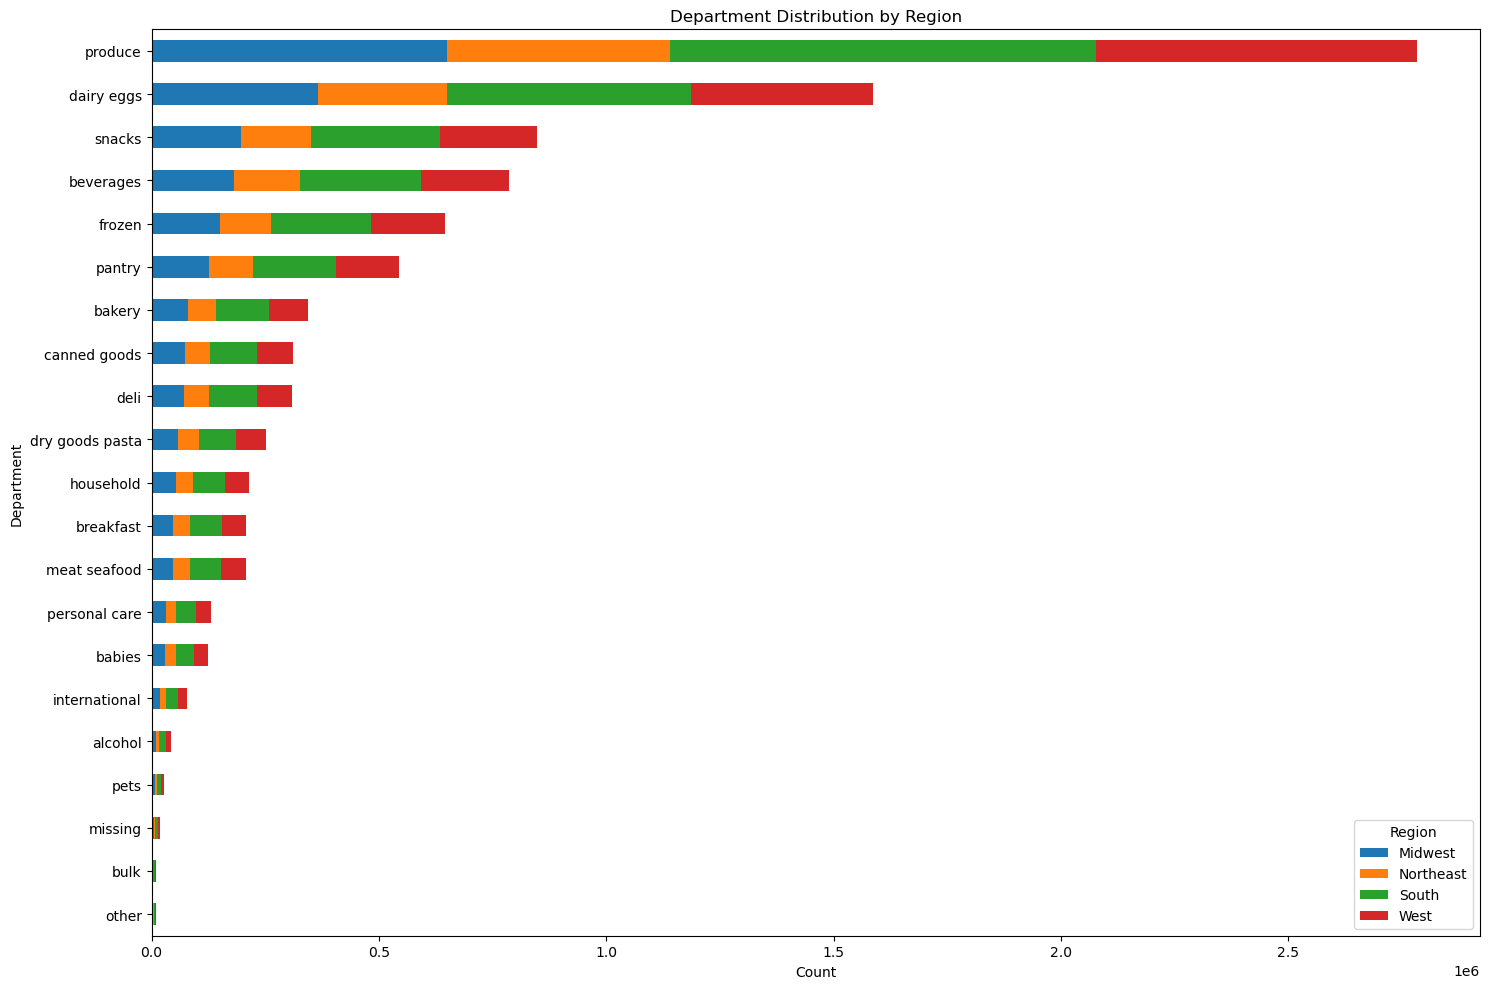

In [83]:
department_region_bar = depatment_region.sort_values(by='Midwest', ascending=True).plot(kind='barh', stacked=True, figsize=(15, 10))
plt.title('Department Distribution by Region')
plt.xlabel('Count')
plt.ylabel('Department')
plt.legend(title='Region')
plt.tight_layout() 
plt.savefig(os.path.join(path, '04 Analysis', 'department_region_bar_orders_dow.png'))
plt.show()

### Sales Team Key Questions - Answers

Busiest days of the week

In [84]:
df['orders_day_of_week'].value_counts(dropna = False)

orders_day_of_week
0    1805183
1    1656114
6    1321090
5    1240109
2    1230486
3    1126247
4    1109227
Name: count, dtype: int64

In [85]:
#Knowing that 0 = Saturday, 1 = Sunday, 2=Monday, 3 = Tuesday, 4=  Wednesday, 5 = Thursday, 6  = Friday; I created a new column called 'week_days_orders'
df['week_days_orders'] = df['orders_day_of_week'].map({0: 'Saturday', 1: 'Sunday', 2: 'Monday', 3: 'Tuesday', 4: 'Wednesday', 5: 'Thursday', 6: 'Friday'})

In [86]:
df['week_days_orders'].value_counts(dropna = False)

week_days_orders
Saturday     1805183
Sunday       1656114
Friday       1321090
Thursday     1240109
Monday       1230486
Tuesday      1126247
Wednesday    1109227
Name: count, dtype: int64

In [87]:
busiest_week_days = df['week_days_orders'].value_counts(dropna = False)

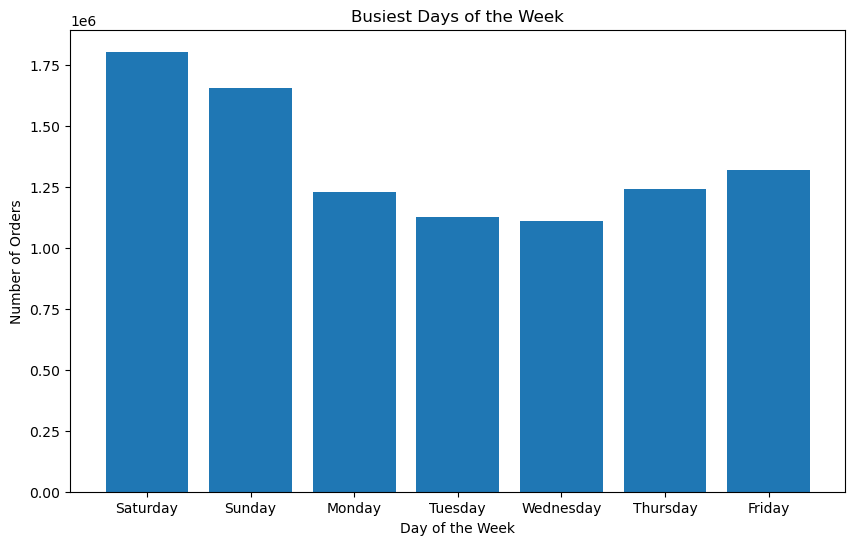

In [89]:
busiest_week_days_bar = df['week_days_orders'].value_counts()
# Sorting the days of the week in the correct order
days_of_week_order = ["Saturday", "Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday"]
busiest_week_days_bar = busiest_week_days_bar.reindex(days_of_week_order)
# Creating a bar chart
plt.figure(figsize=(10, 6))
plt.bar(busiest_week_days_bar.index, busiest_week_days_bar.values)
plt.title('Busiest Days of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Orders')
# Save the figure
plt.savefig(os.path.join(path, '04 Analysis', 'busiest_week_days_bar_orders_dow.png'))
# Show the plot
plt.show()

### Busiest hours of the day

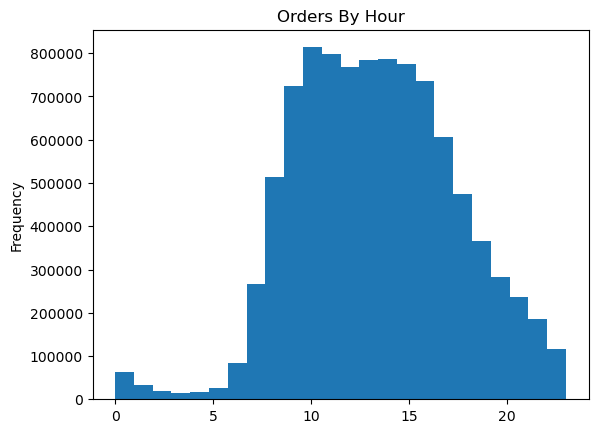

In [90]:
hist_order_hour_of_day = df['order_hour_of_day'].plot.hist(bins = 24, title = 'Orders By Hour')

In [91]:
hist_order_hour_of_day.figure.savefig(os.path.join(path, '04 Analysis', 'hist_order_hour_of_day_orders_dow.png'))

### Hours during the day when people spend the more money

In [92]:
prices_by_hour = pd.crosstab(df['order_hour_of_day'],df['price_range_loc'], dropna = False)

In [93]:
prices_by_hour

price_range_loc,Low-range product,Mid-range product
order_hour_of_day,,
0,19049,42494
1,9836,22106
2,6028,13293
3,4342,9634
4,4851,10838
5,7637,17405
6,25769,57296
7,80617,180825
8,156688,346036


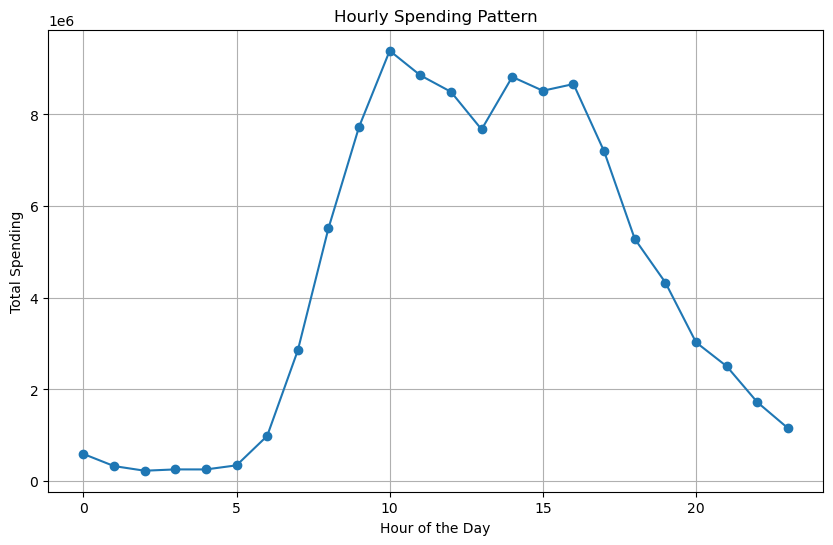

In [94]:
hourly_spending = df.groupby('order_hour_of_day')['prices'].sum()
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(hourly_spending.index, hourly_spending.values, marker='o')
ax.set_title('Hourly Spending Pattern')
ax.set_xlabel('Hour of the Day')
ax.set_ylabel('Total Spending')
ax.grid(True)
# Save the plot
fig.savefig(os.path.join(path, '04 Analysis',  'hourly_spending_plot_orders_dow.png'))

### Price Range Groupings
Price range grouping I did create beforehand. The groupings are mid-range, low-range, and high-range under the "price_range_loc" column

In [95]:
df['prices'].describe()

count    9.488456e+06
mean     1.103810e+01
std      4.049523e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

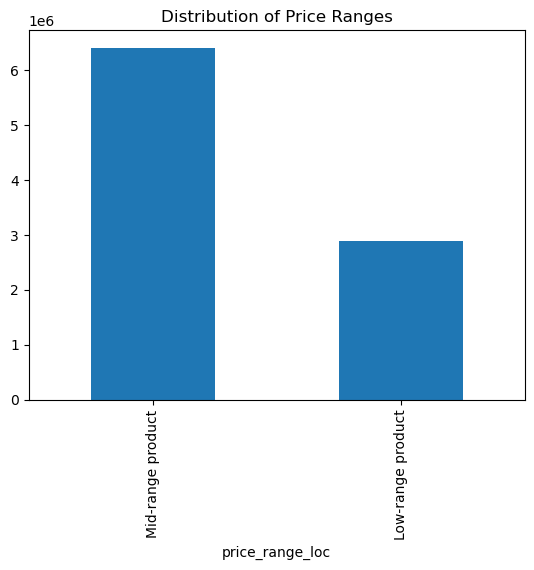

In [96]:
# Price range visual created from 'price_range_loc' grouping
price_range_bar = df['price_range_loc'].value_counts().plot.bar(title = 'Distribution of Price Ranges')

### Income Distribution By Price Range

In [97]:
price_range_income = pd.crosstab(df['price_range_loc'],df['income_group'], dropna = False)

In [98]:
price_range_income

income_group,High Income,Low Income,Middle Income
price_range_loc,,,
Low-range product,689157,832028,1375455
Mid-range product,1632862,1499655,3271337


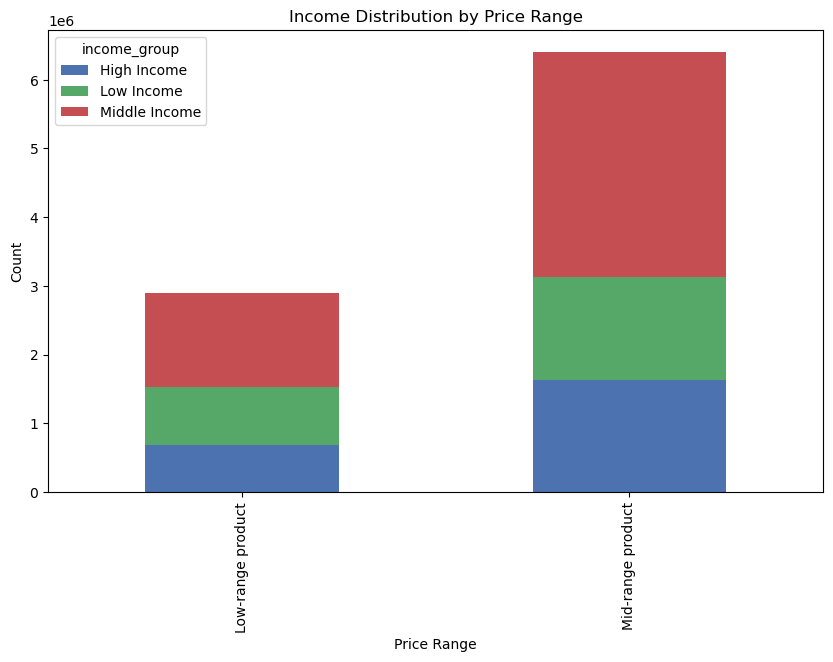

In [99]:
# Creating a stacked bar chart with custom colors
price_range_income.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#4c72b0', '#55a868', '#c44e52'])
plt.title('Income Distribution by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Count')
# Save the figure
plt.savefig(os.path.join(path, '04 Analysis', 'price_range_income_bar_orders_dow.png'))

### Price Range & Family Profile Distribution

In [100]:
price_range_family_profile = pd.crosstab(df['price_range_loc'],df['family_profile'], dropna = False)

In [101]:
price_range_family_profile

family_profile,married female with children,married male with children,single female with children,"single female, no children",single male with children,"single male, no children"
price_range_loc,,,,,,
Low-range product,1022847,1019028,68932,354594,70816,360423
Mid-range product,2248251,2261365,153074,786196,158633,796335


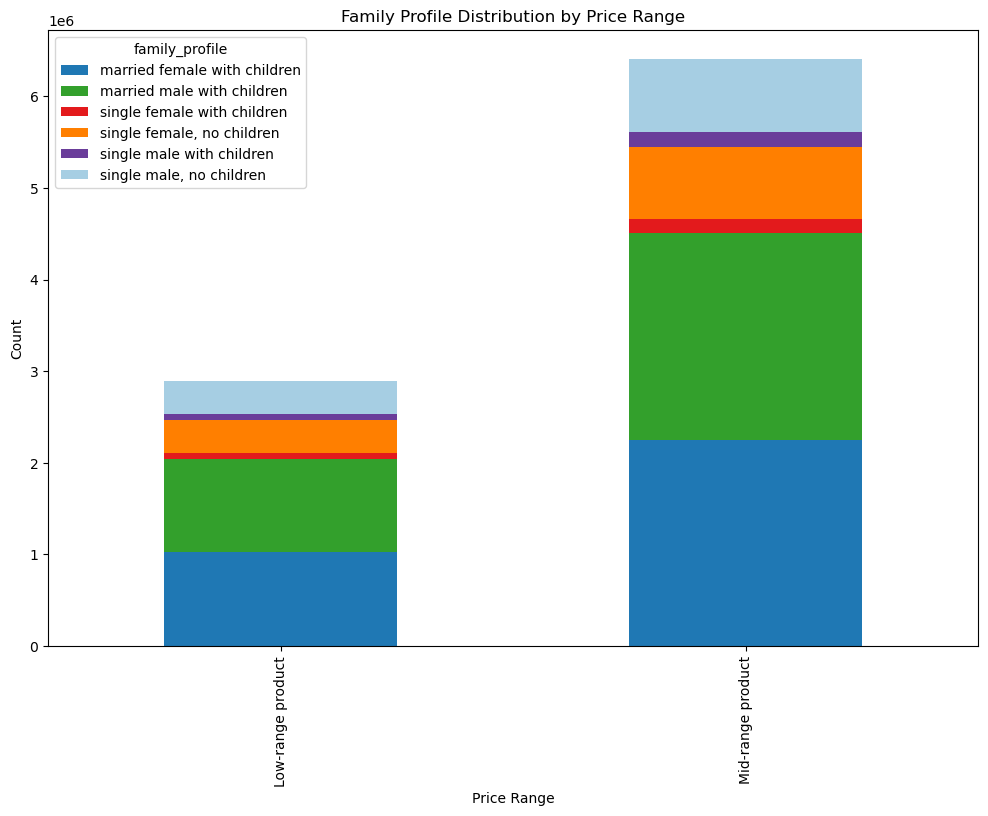

In [103]:
#Reorder columns for better visualization
price_range_family_profile = price_range_family_profile[['married female with children', 'married male with children', 'single female with children', 'single female, no children', 'single male with children', 'single male, no children']]
# Define custom colors
colors = ['#1f78b4', '#33a02c', '#e31a1c', '#ff7f00', '#6a3d9a', '#a6cee3']
# Create a bar chart with custom colors
price_range_family_profile.plot(kind='bar', stacked=True, figsize=(12, 8), color=colors)
# Title and labels
plt.title('Family Profile Distribution by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Count')
# Save the figure
plt.savefig(os.path.join(path, '04 Analysis', 'price_range_family_profile_bar_orders_dow.png'))

### Departments Frequency

Text(0.5, 1.0, 'Orders by Department')

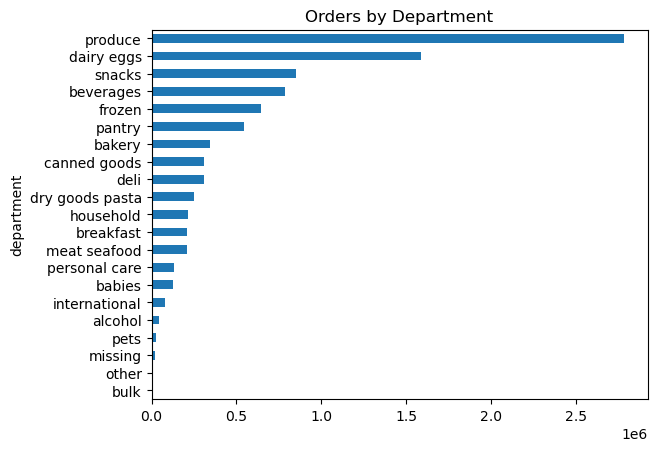

In [104]:
department_frequency = df['department'].value_counts().sort_values(ascending=True).plot.barh()
plt.title("Orders by Department")

In [105]:
department_frequency.figure.savefig(os.path.join(path, '04 Analysis', 'department_frequency_bar_bar_orders_dow.png'))

In [106]:
df.head()

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,price_range_loc,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price,spending_flag,median_orders,order_frequency_flag,first_name,Surnam,gender,STATE,age,date_joined,num_of_dependants,marital_status,income,region,activity_flag,age_group,income_group,department,dependants_group,family_profile,week_days_orders
0,2539329,1,prior,1,2,8,NaN,196,1,0,Soda,77,7,9.0,both,NaN,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,active customer,30-44 years old,Low Income,beverages,Has dependants,married female with children,Monday
1,2398795,1,prior,2,3,7,15.0,196,1,1,Soda,77,7,9.0,both,NaN,Mid-range product,Regularly busy,Least busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,active customer,30-44 years old,Low Income,beverages,Has dependants,married female with children,Tuesday
2,473747,1,prior,3,3,12,21.0,196,1,1,Soda,77,7,9.0,both,NaN,Mid-range product,Regularly busy,Least busy days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,active customer,30-44 years old,Low Income,beverages,Has dependants,married female with children,Tuesday
3,2254736,1,prior,4,4,7,29.0,196,1,1,Soda,77,7,9.0,both,NaN,Mid-range product,Least busy,Least busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,active customer,30-44 years old,Low Income,beverages,Has dependants,married female with children,Wednesday
4,431534,1,prior,5,4,15,28.0,196,1,1,Soda,77,7,9.0,both,NaN,Mid-range product,Least busy,Least busy days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,active customer,30-44 years old,Low Income,beverages,Has dependants,married female with children,Wednesday


### User Distribution - Brand Loyalty

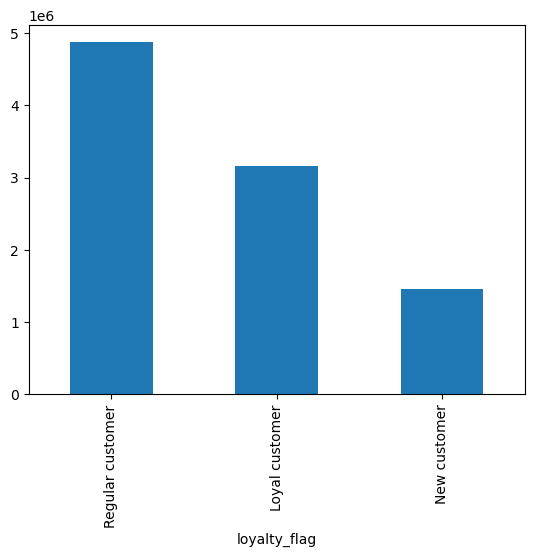

In [108]:
# "Regular Customers" make up most of the instacart users 
loyalty_bar = df['loyalty_flag'].value_counts().plot.bar()

### Ordering Habits Based on Customer’s Loyalty Status

In [109]:
loyalty_flag_department = pd.crosstab(df['department'],df['loyalty_flag'], dropna = False)

In [110]:
loyalty_flag_department

loyalty_flag,Loyal customer,New customer,Regular customer
department,,,
alcohol,11466,9017,23013
babies,50940,13833,59880
bakery,117745,52709,174414
beverages,263144,119905,403967
breakfast,69792,32445,105245
bulk,4099,1316,4845
canned goods,91497,54765,165235
dairy eggs,559020,228741,799335
deli,99484,48456,161880


### Ordering Habits Based On a Customer’s Region

In [115]:
loyalty_flag_region = pd.crosstab(df['region'],df['loyalty_flag'], dropna = False)

In [116]:
loyalty_flag_region

loyalty_flag,Loyal customer,New customer,Regular customer
region,,,
Midwest,732800,341381,1137876
Northeast,591151,249219,851509
South,1051340,491013,1640415
West,782115,379512,1240125


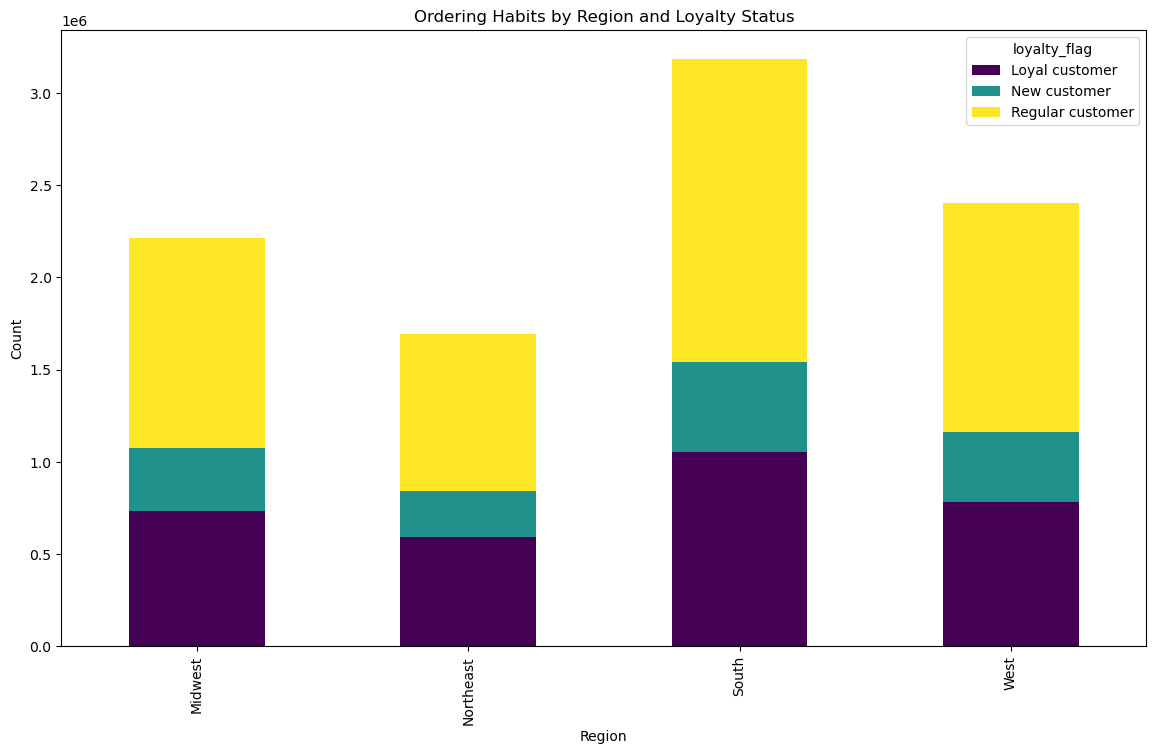

In [117]:
# Create a crosstab of region and loyalty_flag
loyalty_flag_region = pd.crosstab(df['region'], df['loyalty_flag'], dropna=False)
# Reorder columns for better visualization
loyalty_flag_region = loyalty_flag_region[['Loyal customer', 'New customer', 'Regular customer']]
# Create a stacked bar chart
loyalty_flag_region.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='viridis')
# Title and labels
plt.title('Ordering Habits by Region and Loyalty Status')
plt.xlabel('Region')
plt.ylabel('Count')
# Save the figure
plt.savefig(os.path.join(path, '04 Analysis', 'loyalty_flag_region_bar_orders_dow.png'))
# Show the plot
plt.show()

### Connection between age and family status in terms of ordering habits

In [118]:
age_family_profile = pd.crosstab(df['age_group'],df['family_profile'], dropna = False)

In [119]:
age_family_profile

family_profile,married female with children,married male with children,single female with children,"single female, no children",single male with children,"single male, no children"
age_group,,,,,,
18-29 years old,445208,448168,226303,207403,234109,217866
30-44 years old,829895,839203,0,282939,0,285586
45-59 years old,852723,836215,0,279005,0,270168
60-81 years old,1209672,1224195,0,393698,0,406100


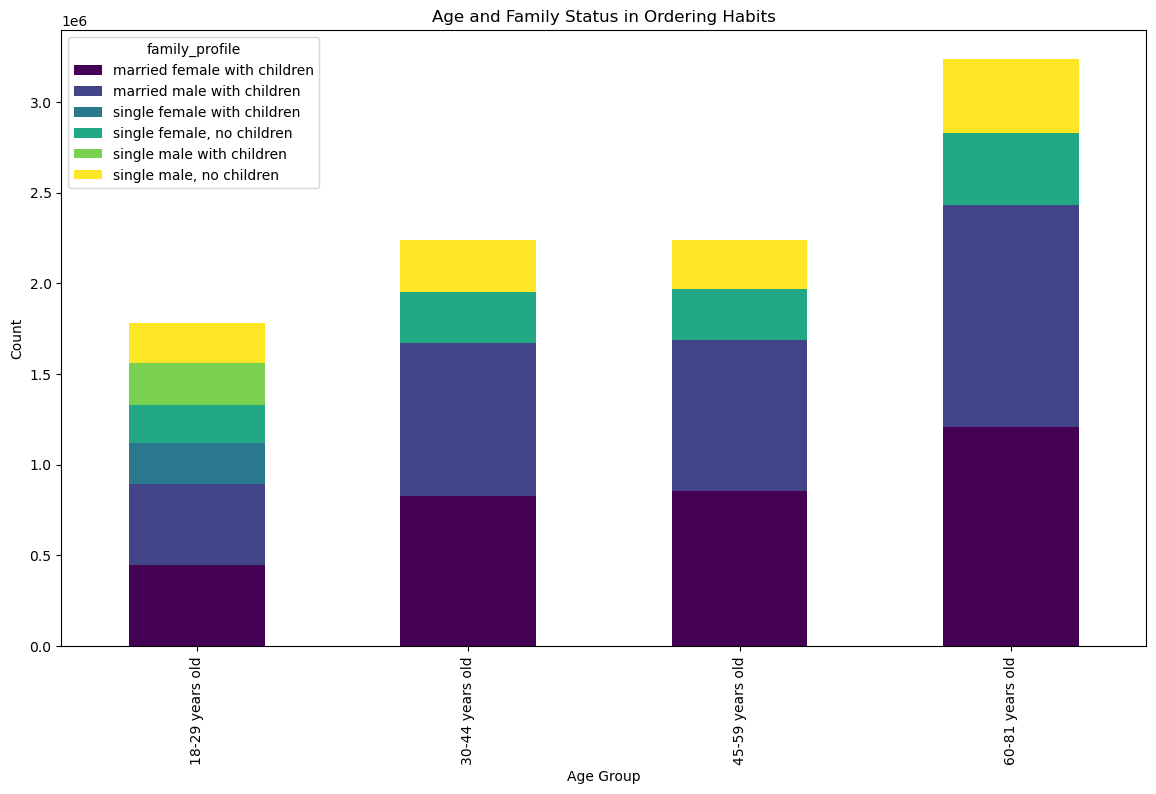

In [121]:
# Create a crosstab of age_group and family_profile
age_family_crosstab = pd.crosstab(df['age_group'], df['family_profile'], dropna=False)
# Reorder columns for better visualization
age_family_crosstab = age_family_crosstab[['married female with children', 'married male with children', 'single female with children', 'single female, no children', 'single male with children', 'single male, no children']]
# Create a stacked bar chart
age_family_crosstab.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='viridis')
# Title and labels
plt.title('Age and Family Status in Ordering Habits')
plt.xlabel('Age Group')
plt.ylabel('Count')
# Save the figure
plt.savefig(os.path.join(path, '04 Analysis', 'age_family_bar_orders_dow_chart.png'))
# Show the plot
plt.show()

### Exploring whether there is a connection between age and spending power (income)

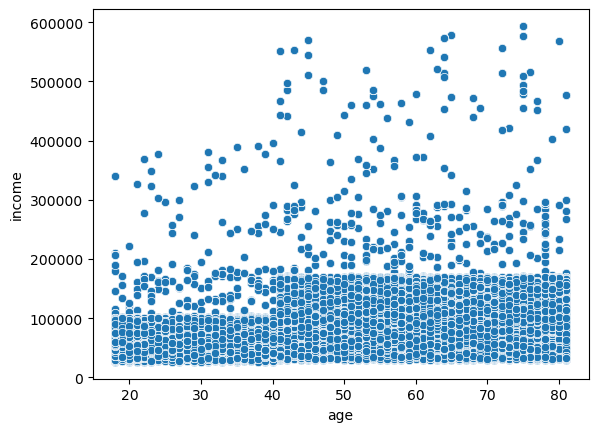

In [122]:
# There is a positive relationship between age and income. We can see that clearly on people of age of over 40
age_income_scatterplot = sns.scatterplot(x = 'age', y = 'income', data = df)

In [123]:
age_income_scatterplot.figure.savefig(os.path.join(path, '04 Analysis', 'age_income__orders_dow_scatterplot.png'))

In [126]:
df.head()

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,price_range_loc,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price,spending_flag,median_orders,order_frequency_flag,first_name,Surnam,gender,STATE,age,date_joined,num_of_dependants,marital_status,income,region,activity_flag,age_group,income_group,department,dependants_group,family_profile,week_days_orders
0,2539329,1,prior,1,2,8,NaN,196,1,0,Soda,77,7,9.0,both,NaN,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,active customer,30-44 years old,Low Income,beverages,Has dependants,married female with children,Monday
1,2398795,1,prior,2,3,7,15.0,196,1,1,Soda,77,7,9.0,both,NaN,Mid-range product,Regularly busy,Least busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,active customer,30-44 years old,Low Income,beverages,Has dependants,married female with children,Tuesday
2,473747,1,prior,3,3,12,21.0,196,1,1,Soda,77,7,9.0,both,NaN,Mid-range product,Regularly busy,Least busy days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,active customer,30-44 years old,Low Income,beverages,Has dependants,married female with children,Tuesday
3,2254736,1,prior,4,4,7,29.0,196,1,1,Soda,77,7,9.0,both,NaN,Mid-range product,Least busy,Least busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,active customer,30-44 years old,Low Income,beverages,Has dependants,married female with children,Wednesday
4,431534,1,prior,5,4,15,28.0,196,1,1,Soda,77,7,9.0,both,NaN,Mid-range product,Least busy,Least busy days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,active customer,30-44 years old,Low Income,beverages,Has dependants,married female with children,Wednesday


### Age and Family Status in Ordering Habits

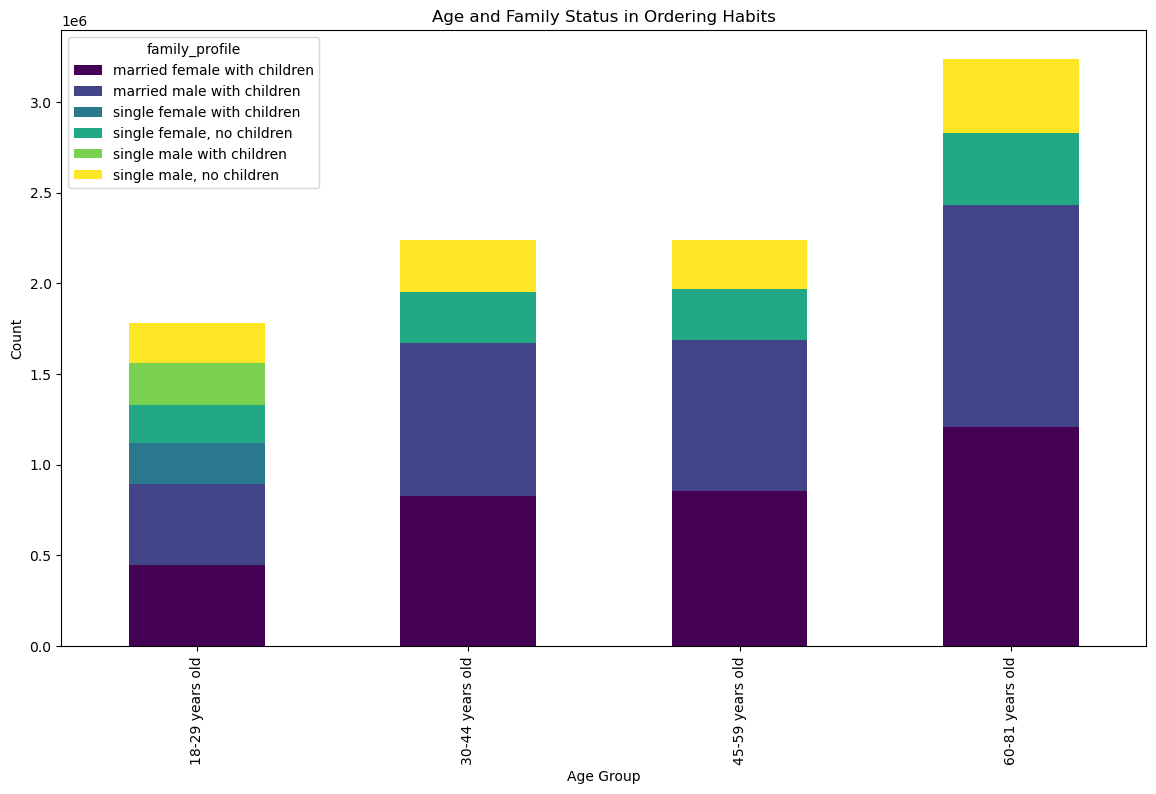

In [127]:
# Creating a crosstab of age_group and family_profile
age_family_crosstab = pd.crosstab(df['age_group'], df['family_profile'], dropna=False)
# Reorder columns for better visualization
age_family_crosstab = age_family_crosstab[['married female with children', 'married male with children', 'single female with children', 'single female, no children', 'single male with children', 'single male, no children']]
# Stacked bar chart
age_family_crosstab.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='viridis')

# Title and labels
plt.title('Age and Family Status in Ordering Habits')
plt.xlabel('Age Group')
plt.ylabel('Count')

# Save the figure
plt.savefig(os.path.join(path, '04 Analysis', 'age_family_bar__orders_dow_chart.png'))

# Show the plot
plt.show()

### Most of the customers are married

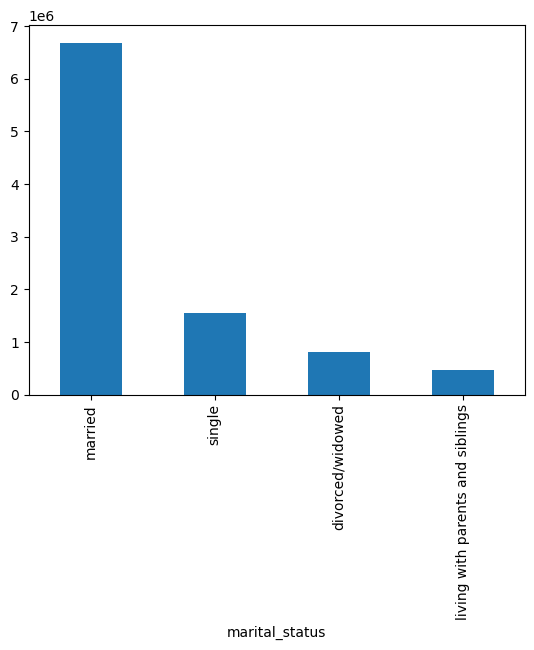

In [128]:
bar_marital = df['marital_status'].value_counts().plot.bar()

In [129]:
bar_marital.figure.savefig(os.path.join(path, '04 Analysis', 'bar_marital__orders_dow.png'))

In [131]:
# importing this final cleaned data set
df.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'instacart_visual_the_end.pkl'))